In [1]:

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [16]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [4]:
import splitfolders
splitfolders.ratio('dataset', output="SPLIT1", seed=42, ratio=(.7, 0.15,0.15))

Copying files: 3076 files [00:28, 106.69 files/s]


In [5]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'SPLIT1/train'
valid_path = 'SPLIT1/test'

In [6]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:

  # useful for getting number of output classes
folders = glob('SPLIT1/train/*')

In [9]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# our layers - you can add more if you want
x = Flatten()(inception.output)
x = Dense(512, activation='relu')(x)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 111, 111, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 111, 111, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 111, 111, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 109, 109, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 109, 109, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 109, 109, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 109, 109, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 109, 109, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 109, 109, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 54, 54, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 54, 54, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 54, 54, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 54, 54, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 52, 52, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 48,021,287 (183.19 MB)

 Trainable params: 26,218,503 (100.02 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import math

# Define a function to adjust the learning rate
def lr_schedule(epoch, lr):
    # Learning rate schedule can be adjusted based on the epoch
    if epoch < 10:
        return lr  # Keep the initial learning rate for the first 10 epochs
    else:
        return lr * math.exp(-0.1)  # Exponential decay schedule

# Define the initial learning rate
initial_lr = 0.0001  # Best performing learning rate

# Create an instance of the LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

In [13]:
for layer in inception.layers[:249]:
    layer.trainable = False
for layer in inception.layers[249:]:
    layer.trainable = True

In [14]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', 
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')],
             )


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('SPLIT1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2457 images belonging to 7 classes.


In [17]:
test_set = test_datagen.flow_from_directory('SPLIT1/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 468 images belonging to 7 classes.


In [18]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  callbacks=[lr_scheduler]  
)

Epoch 1/20


C:\Users\KIIT\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/77 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.3602 - loss: 2.0560 - precision: 0.4524 - recall: 0.2044 - val_accuracy: 0.5556 - val_loss: 1.2407 - val_precision: 0.6635 - val_recall: 0.4509 - learning_rate: 1.0000e-04
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.6416 - loss: 0.9445 - precision: 0.7437 - recall: 0.5176 - val_accuracy: 0.5962 - val_loss: 1.0607 - val_precision: 0.6824 - val_recall: 0.5556 - learning_rate: 1.0000e-04
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.7765 - loss: 0.6087 - precision: 0.8322 - recall: 0.7065 - val_accuracy: 0.6838 - val_loss: 0.8790 - val_precision: 0.7183 - val_recall: 0.6538 - learning_rate: 1.0000e-04
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.8501 - loss: 0.4454 - precision: 0.8937 - recall: 0.8066 - val_accuracy: 0.6987 - val_loss: 0.8746 - val_precision: 0.7435 - val_recall: 0.6688 - learning_rate: 1.0000e-04
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 

In [19]:
import matplotlib.pyplot as plt


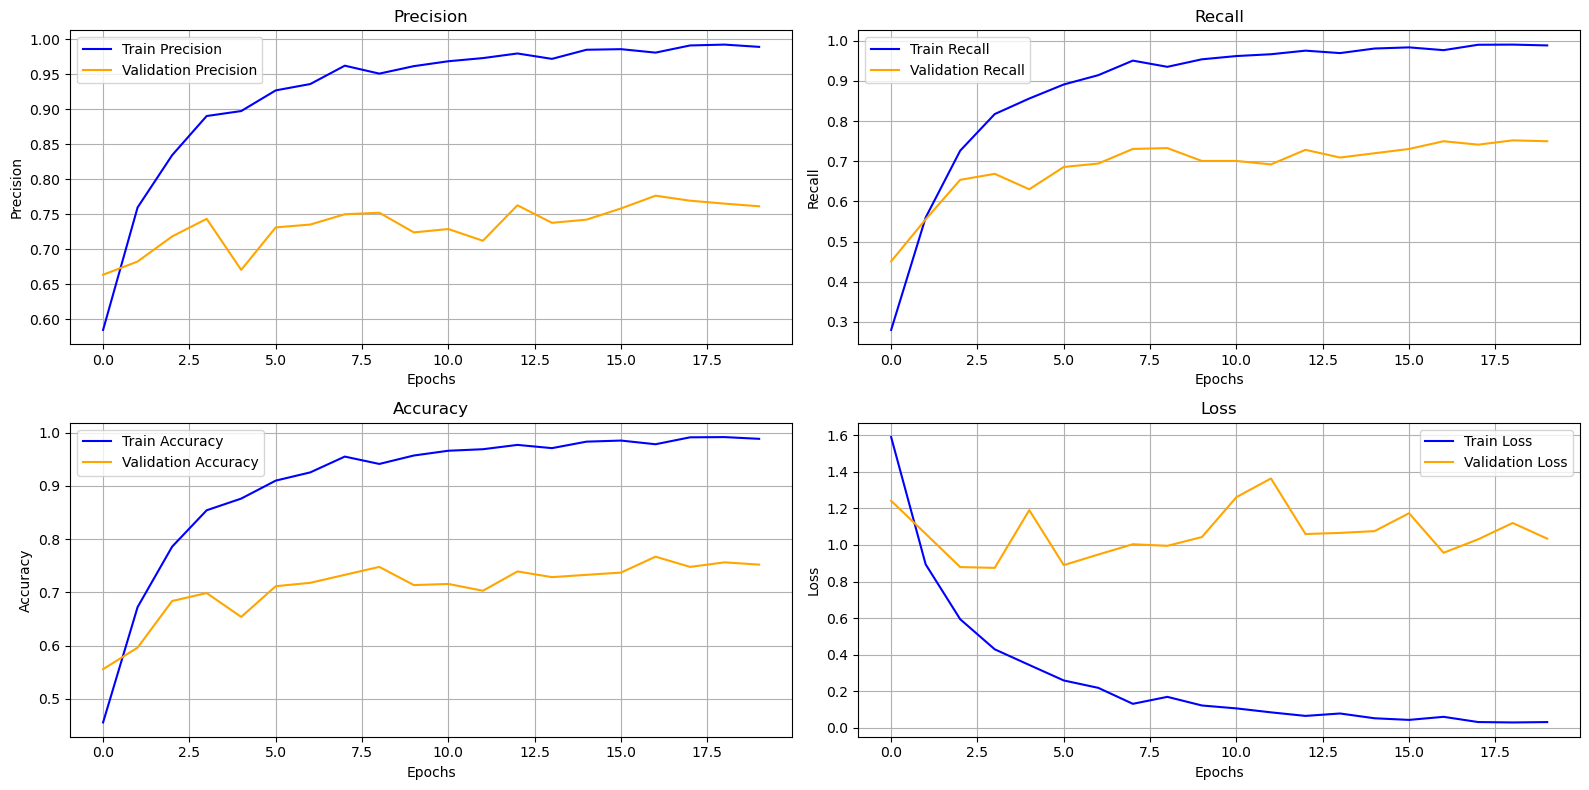

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the metrics
plt.figure(figsize=(16, 8))

# Line plots for precision, recall, accuracy, and loss
plt.subplot(2, 2, 1)
plt.plot(r.history['precision'], label='Train Precision', color='blue')
plt.plot(r.history['val_precision'], label='Validation Precision', color='orange')
plt.title('Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(r.history['recall'], label='Train Recall', color='blue')
plt.plot(r.history['val_recall'], label='Validation Recall', color='orange')
plt.title('Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(r.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(r.history['loss'], label='Train Loss', color='blue')
plt.plot(r.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Adjust layout and save/show the plot
plt.tight_layout()
plt.savefig('MetricsAndLossPlot30epoch.png')
plt.show()


In [21]:
from tensorflow.keras.models import load_model

model.save('model_final.h5')

In [22]:
y_pred = model.predict(test_set)

15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step


In [23]:
y_pred

array([[3.67695793e-05, 8.60121929e-07, 3.91000904e-05, ...,
        3.14862409e-04, 4.90939710e-05, 9.99559104e-01],
       [1.90721698e-06, 9.07441020e-01, 2.38523306e-03, ...,
        1.85728818e-03, 1.07693588e-02, 7.75434896e-02],
       [2.30318165e-05, 8.21979995e-08, 8.66912671e-07, ...,
        1.70866086e-04, 2.36534348e-08, 9.99805152e-01],
       ...,
       [2.85393944e-05, 6.07143564e-04, 1.44120000e-04, ...,
        9.98307347e-01, 2.54900278e-05, 3.93284950e-04],
       [1.06418476e-07, 9.99297023e-01, 1.97260208e-09, ...,
        7.02030258e-04, 6.00084093e-07, 1.93039796e-07],
       [9.87254202e-01, 6.42769592e-05, 5.19988220e-03, ...,
        4.33728844e-03, 3.50474038e-05, 3.07643716e-03]], dtype=float32)

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([6, 1, 6, 0, 6, 5, 0, 0, 2, 6, 4, 5, 1, 1, 2, 1, 5, 4, 4, 5, 1, 0,
       0, 0, 6, 4, 0, 5, 4, 1, 6, 0, 1, 0, 1, 5, 1, 6, 0, 0, 0, 2, 5, 1,
       1, 2, 1, 6, 4, 6, 2, 6, 0, 2, 0, 6, 5, 0, 4, 5, 1, 2, 1, 0, 4, 4,
       0, 6, 1, 2, 4, 0, 1, 0, 5, 6, 6, 0, 5, 6, 5, 0, 1, 6, 5, 0, 4, 1,
       4, 6, 3, 0, 6, 1, 1, 1, 4, 6, 2, 5, 4, 5, 1, 1, 4, 1, 6, 6, 5, 2,
       2, 4, 2, 1, 1, 4, 0, 0, 6, 0, 5, 2, 1, 6, 6, 3, 5, 5, 0, 4, 6, 4,
       5, 6, 4, 1, 6, 2, 1, 1, 4, 1, 0, 1, 6, 6, 4, 6, 0, 6, 4, 5, 1, 5,
       0, 0, 6, 0, 6, 2, 2, 4, 0, 6, 0, 0, 4, 0, 0, 5, 4, 1, 4, 1, 6, 4,
       0, 6, 4, 1, 1, 4, 1, 1, 1, 5, 6, 1, 0, 6, 4, 6, 4, 6, 4, 0, 4, 4,
       5, 4, 4, 6, 2, 1, 4, 1, 1, 4, 1, 1, 1, 6, 4, 1, 6, 1, 4, 4, 4, 1,
       4, 1, 4, 0, 0, 0, 0, 0, 4, 1, 0, 4, 4, 4, 2, 0, 5, 4, 4, 5, 4, 4,
       5, 1, 5, 6, 6, 0, 3, 2, 2, 1, 5, 4, 0, 4, 4, 2, 5, 6, 0, 4, 1, 3,
       6, 2, 6, 2, 4, 1, 4, 1, 1, 3, 5, 2, 1, 6, 1, 4, 4, 1, 0, 2, 1, 6,
       4, 0, 1, 5, 0, 2, 0, 0, 1, 4, 1, 6, 1, 0, 5,

In [26]:
import tensorflow as tf

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


In [27]:
class_names = list(training_set.class_indices.keys())
class_names

['Bacteria', 'Fungi', 'Healthy', 'Nematode', 'Pest', 'Phytopthora', 'Virus']

1/1 [==============================] - 1s 547ms/step


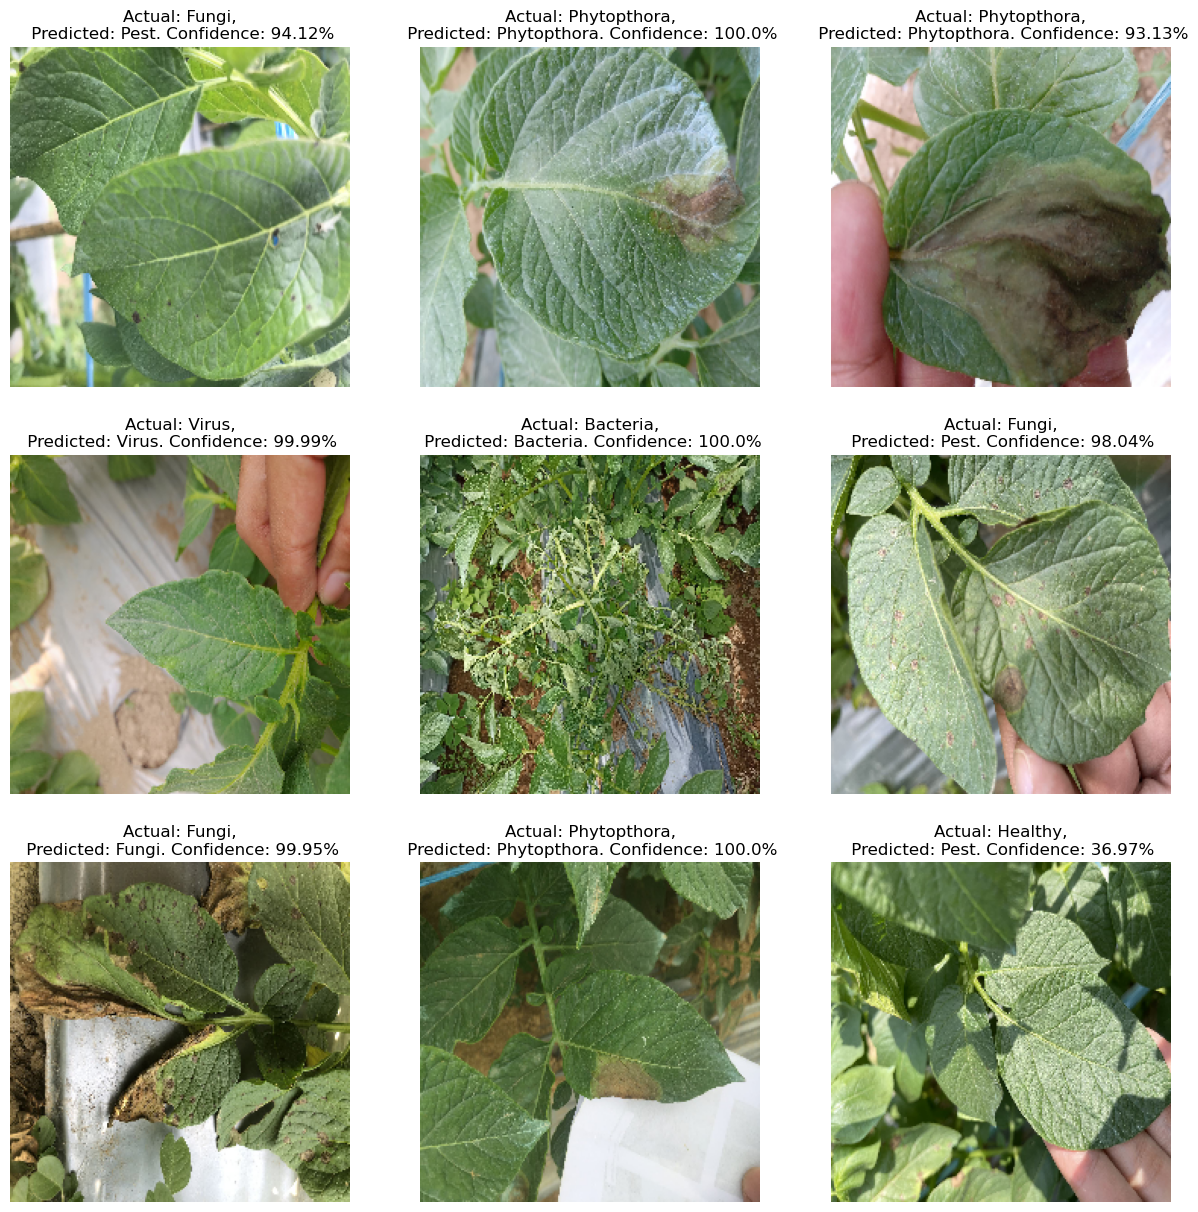

In [68]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    predictions = model.predict(images)
    for i in range(min(len(images), 9)):  # Iterate over the images in the batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class_index = np.argmax(predictions[i])
        predicted_class = class_names[predicted_class_index]
        actual_class_index = np.argmax(labels[i])
        actual_class = class_names[actual_class_index]
        confidence = round(100 * predictions[i][predicted_class_index], 2)
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}. Confidence: {confidence}%")
        
        plt.axis("off")
    break
plt.show()
